# A Gentle Introduction to Tensorflow

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

/home/prateek/anaconda3/envs/dltfgpu/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


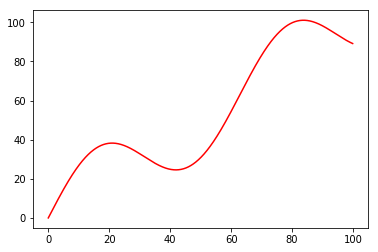

In [2]:
# Define input data
X_data = np.arange(100, step=0.1)
y_data = X_data + 20 * np.sin(X_data / 10)

# Plot input data
plt.plot(X_data, y_data, c='r')
plt.show()

In [3]:
# Define parameters
n_samples = len(X_data)
batch_size = 100

# TensorFlow requires each sample to be an array even if the number of features is one
X_data = np.reshape(X_data, (n_samples, 1))
y_data = np.reshape(y_data, (n_samples, 1))

# Define placeholders for input
X = tf.placeholder(tf.float32, shape=(batch_size, 1))
y = tf.placeholder(tf.float32, shape=(batch_size, 1))

# Define variables to be learned
with tf.variable_scope("linear-regression"):
    # Define a tensor of size 1 x 1
    W = tf.get_variable("weights", (1, 1),
                        # initialize W randomly from normal
                        # distribution
                        initializer=tf.random_normal_initializer())
    # Define a tensor of size 1 (vector of size 1)
    b = tf.get_variable("bias", (1, ),
                        # initialized with 0
                        initializer=tf.constant_initializer(0.0))
    y_pred = tf.matmul(X, W) + b
    loss = tf.reduce_sum((y - y_pred) ** 2 / n_samples)


# Define optimizer operation
optimizer = tf.train.AdamOptimizer()
optimize = optimizer.minimize(loss)



In [4]:
# Define number of gradient descent loops
n_loops = 5000

with tf.Session() as sess:
    # Initialize Variables in graph
    sess.run(tf.global_variables_initializer())

    for step_idx in range(n_loops):
        # Select random mini-batch
        indices = np.random.choice(n_samples, batch_size)
        X_batch, y_batch = X_data[indices], y_data[indices]

        # Perform a single gradient descent step
        _, loss_val = sess.run([optimize, loss],
                               # feed_dict: placeholder -> data
                               feed_dict={X: X_batch, y: y_batch})

        # Print training status
        print("[{}] loss: {}".format(step_idx + 1, loss_val))

    W_val, b_val = sess.run([W, b])


[1] loss: 379.81256103515625
[2] loss: 381.3962707519531
[3] loss: 357.5647888183594
[4] loss: 338.80194091796875
[5] loss: 383.5502624511719
[6] loss: 370.17047119140625
[7] loss: 422.755126953125
[8] loss: 375.861328125
[9] loss: 346.90570068359375
[10] loss: 422.478759765625
[11] loss: 358.6930236816406
[12] loss: 417.7884216308594
[13] loss: 313.3218078613281
[14] loss: 333.3658142089844
[15] loss: 302.5353088378906
[16] loss: 369.4288635253906
[17] loss: 407.0670166015625
[18] loss: 362.78778076171875
[19] loss: 350.63104248046875
[20] loss: 360.721435546875
[21] loss: 436.7278747558594
[22] loss: 352.4427795410156
[23] loss: 390.2742919921875
[24] loss: 354.8216857910156
[25] loss: 385.40118408203125
[26] loss: 327.6668701171875
[27] loss: 416.0451354980469
[28] loss: 296.6101989746094
[29] loss: 325.012939453125
[30] loss: 320.19580078125
[31] loss: 312.63922119140625
[32] loss: 406.45489501953125
[33] loss: 334.67791748046875
[34] loss: 363.4963684082031
[35] loss: 355.65161132

[304] loss: 190.24972534179688
[305] loss: 222.8616485595703
[306] loss: 217.39883422851562
[307] loss: 179.13424682617188
[308] loss: 195.87533569335938
[309] loss: 227.2151336669922
[310] loss: 185.68809509277344
[311] loss: 214.9645233154297
[312] loss: 170.23858642578125
[313] loss: 169.9603271484375
[314] loss: 197.15171813964844
[315] loss: 210.6890106201172
[316] loss: 176.0727996826172
[317] loss: 185.95909118652344
[318] loss: 187.91464233398438
[319] loss: 157.25457763671875
[320] loss: 198.60385131835938
[321] loss: 186.88333129882812
[322] loss: 180.9759979248047
[323] loss: 211.23928833007812
[324] loss: 170.97891235351562
[325] loss: 210.53530883789062
[326] loss: 195.00274658203125
[327] loss: 203.38287353515625
[328] loss: 197.91885375976562
[329] loss: 192.3656768798828
[330] loss: 189.27224731445312
[331] loss: 196.1295623779297
[332] loss: 229.8726348876953
[333] loss: 162.26536560058594
[334] loss: 198.18624877929688
[335] loss: 196.0205535888672
[336] loss: 166.665

[593] loss: 122.03836059570312
[594] loss: 97.91444396972656
[595] loss: 110.46989440917969
[596] loss: 105.36512756347656
[597] loss: 129.5625457763672
[598] loss: 92.24739074707031
[599] loss: 114.55332946777344
[600] loss: 107.84546661376953
[601] loss: 86.90848541259766
[602] loss: 115.70052337646484
[603] loss: 97.47205352783203
[604] loss: 117.82320404052734
[605] loss: 126.99586486816406
[606] loss: 116.80430603027344
[607] loss: 116.22406005859375
[608] loss: 119.9950942993164
[609] loss: 99.13553619384766
[610] loss: 109.74664306640625
[611] loss: 88.40104675292969
[612] loss: 124.4095458984375
[613] loss: 101.97435760498047
[614] loss: 103.03429412841797
[615] loss: 94.91232299804688
[616] loss: 105.0924301147461
[617] loss: 89.88729858398438
[618] loss: 96.82857513427734
[619] loss: 114.24430847167969
[620] loss: 100.8940658569336
[621] loss: 102.87887573242188
[622] loss: 112.0963363647461
[623] loss: 108.70903778076172
[624] loss: 99.13029479980469
[625] loss: 115.99870300

[881] loss: 55.62056350708008
[882] loss: 50.63311767578125
[883] loss: 53.2865104675293
[884] loss: 47.828609466552734
[885] loss: 64.47110748291016
[886] loss: 50.08860778808594
[887] loss: 66.3270034790039
[888] loss: 57.96107864379883
[889] loss: 48.658416748046875
[890] loss: 54.050662994384766
[891] loss: 53.221290588378906
[892] loss: 59.40193176269531
[893] loss: 54.43315124511719
[894] loss: 68.43199920654297
[895] loss: 60.78435516357422
[896] loss: 63.66659927368164
[897] loss: 55.211910247802734
[898] loss: 59.67963409423828
[899] loss: 49.926185607910156
[900] loss: 64.14339447021484
[901] loss: 52.53520965576172
[902] loss: 55.12208938598633
[903] loss: 67.48359680175781
[904] loss: 53.43824768066406
[905] loss: 57.70924377441406
[906] loss: 54.375404357910156
[907] loss: 54.769508361816406
[908] loss: 46.75236892700195
[909] loss: 50.53467559814453
[910] loss: 48.21319580078125
[911] loss: 51.1826171875
[912] loss: 53.04055404663086
[913] loss: 50.15554428100586
[914] lo

[1161] loss: 33.23428726196289
[1162] loss: 32.43205261230469
[1163] loss: 31.821260452270508
[1164] loss: 35.92485427856445
[1165] loss: 31.835079193115234
[1166] loss: 32.55516815185547
[1167] loss: 26.65671157836914
[1168] loss: 35.73933029174805
[1169] loss: 32.651546478271484
[1170] loss: 36.058509826660156
[1171] loss: 34.69462966918945
[1172] loss: 32.72459030151367
[1173] loss: 29.672998428344727
[1174] loss: 39.496177673339844
[1175] loss: 34.743709564208984
[1176] loss: 38.836002349853516
[1177] loss: 37.98373794555664
[1178] loss: 27.25857925415039
[1179] loss: 31.946712493896484
[1180] loss: 28.641277313232422
[1181] loss: 35.28266143798828
[1182] loss: 33.91672897338867
[1183] loss: 31.83681869506836
[1184] loss: 37.111351013183594
[1185] loss: 32.38103103637695
[1186] loss: 38.975929260253906
[1187] loss: 31.160634994506836
[1188] loss: 32.840091705322266
[1189] loss: 35.02214050292969
[1190] loss: 30.82806968688965
[1191] loss: 40.89008331298828
[1192] loss: 29.787755966

[1423] loss: 19.778789520263672
[1424] loss: 24.265220642089844
[1425] loss: 26.081771850585938
[1426] loss: 24.41703987121582
[1427] loss: 25.469615936279297
[1428] loss: 25.788894653320312
[1429] loss: 21.41671371459961
[1430] loss: 24.929296493530273
[1431] loss: 20.95951271057129
[1432] loss: 24.25050163269043
[1433] loss: 22.109155654907227
[1434] loss: 24.766054153442383
[1435] loss: 24.60396385192871
[1436] loss: 21.266956329345703
[1437] loss: 23.729806900024414
[1438] loss: 25.59014892578125
[1439] loss: 24.32807159423828
[1440] loss: 22.341230392456055
[1441] loss: 23.532917022705078
[1442] loss: 23.884126663208008
[1443] loss: 24.060176849365234
[1444] loss: 24.92799186706543
[1445] loss: 23.915029525756836
[1446] loss: 21.961341857910156
[1447] loss: 17.395994186401367
[1448] loss: 21.780715942382812
[1449] loss: 23.628093719482422
[1450] loss: 23.052230834960938
[1451] loss: 23.208852767944336
[1452] loss: 23.118467330932617
[1453] loss: 22.6429386138916
[1454] loss: 23.08

[1931] loss: 16.557254791259766
[1932] loss: 18.48956298828125
[1933] loss: 15.548612594604492
[1934] loss: 17.824783325195312
[1935] loss: 18.017120361328125
[1936] loss: 16.56499481201172
[1937] loss: 18.31972885131836
[1938] loss: 16.47054672241211
[1939] loss: 18.48670196533203
[1940] loss: 20.300556182861328
[1941] loss: 18.18434715270996
[1942] loss: 17.050426483154297
[1943] loss: 19.516555786132812
[1944] loss: 18.167524337768555
[1945] loss: 18.717914581298828
[1946] loss: 18.794326782226562
[1947] loss: 18.595670700073242
[1948] loss: 18.204044342041016
[1949] loss: 20.821701049804688
[1950] loss: 18.279212951660156
[1951] loss: 18.037595748901367
[1952] loss: 17.7109317779541
[1953] loss: 18.81362533569336
[1954] loss: 20.2861385345459
[1955] loss: 16.54531478881836
[1956] loss: 19.537540435791016
[1957] loss: 19.52385711669922
[1958] loss: 18.17982292175293
[1959] loss: 15.809453964233398
[1960] loss: 20.806201934814453
[1961] loss: 19.665857315063477
[1962] loss: 19.633129

[2195] loss: 21.293787002563477
[2196] loss: 18.05040168762207
[2197] loss: 18.2703914642334
[2198] loss: 19.285865783691406
[2199] loss: 19.934072494506836
[2200] loss: 17.059017181396484
[2201] loss: 17.470474243164062
[2202] loss: 18.297889709472656
[2203] loss: 18.139842987060547
[2204] loss: 18.56244468688965
[2205] loss: 19.720901489257812
[2206] loss: 16.35605812072754
[2207] loss: 20.264911651611328
[2208] loss: 16.925975799560547
[2209] loss: 18.166711807250977
[2210] loss: 19.802146911621094
[2211] loss: 20.180435180664062
[2212] loss: 18.040815353393555
[2213] loss: 17.76116180419922
[2214] loss: 18.423442840576172
[2215] loss: 20.59296417236328
[2216] loss: 19.616945266723633
[2217] loss: 16.610088348388672
[2218] loss: 17.66780662536621
[2219] loss: 16.413373947143555
[2220] loss: 19.265018463134766
[2221] loss: 16.156579971313477
[2222] loss: 18.015779495239258
[2223] loss: 19.150358200073242
[2224] loss: 17.510690689086914
[2225] loss: 16.948148727416992
[2226] loss: 17.

[2695] loss: 16.16229820251465
[2696] loss: 18.445436477661133
[2697] loss: 19.25438117980957
[2698] loss: 16.645479202270508
[2699] loss: 18.657331466674805
[2700] loss: 15.308059692382812
[2701] loss: 19.79653549194336
[2702] loss: 20.140426635742188
[2703] loss: 19.594661712646484
[2704] loss: 18.380321502685547
[2705] loss: 19.166292190551758
[2706] loss: 16.86644172668457
[2707] loss: 17.45109748840332
[2708] loss: 18.01412010192871
[2709] loss: 18.984169006347656
[2710] loss: 19.767845153808594
[2711] loss: 20.10433006286621
[2712] loss: 20.02614402770996
[2713] loss: 19.41123390197754
[2714] loss: 17.280405044555664
[2715] loss: 20.674028396606445
[2716] loss: 15.615371704101562
[2717] loss: 17.605106353759766
[2718] loss: 17.80497932434082
[2719] loss: 19.482980728149414
[2720] loss: 16.623830795288086
[2721] loss: 18.171985626220703
[2722] loss: 18.741859436035156
[2723] loss: 16.92306137084961
[2724] loss: 21.01511573791504
[2725] loss: 17.784883499145508
[2726] loss: 18.9546

[3180] loss: 16.843597412109375
[3181] loss: 20.048358917236328
[3182] loss: 18.487058639526367
[3183] loss: 15.61848258972168
[3184] loss: 15.764092445373535
[3185] loss: 17.207128524780273
[3186] loss: 16.976715087890625
[3187] loss: 18.411680221557617
[3188] loss: 19.782350540161133
[3189] loss: 19.824846267700195
[3190] loss: 17.42693519592285
[3191] loss: 15.88075065612793
[3192] loss: 20.54166030883789
[3193] loss: 16.553874969482422
[3194] loss: 18.46286964416504
[3195] loss: 19.516691207885742
[3196] loss: 20.06200408935547
[3197] loss: 18.800994873046875
[3198] loss: 20.899194717407227
[3199] loss: 16.74631690979004
[3200] loss: 19.221046447753906
[3201] loss: 17.99146842956543
[3202] loss: 18.348094940185547
[3203] loss: 18.17300033569336
[3204] loss: 16.886064529418945
[3205] loss: 18.1875
[3206] loss: 15.872550010681152
[3207] loss: 14.725749015808105
[3208] loss: 19.48353385925293
[3209] loss: 15.782126426696777
[3210] loss: 22.985992431640625
[3211] loss: 17.5722808837890

[3635] loss: 19.518821716308594
[3636] loss: 17.023035049438477
[3637] loss: 20.221872329711914
[3638] loss: 17.625429153442383
[3639] loss: 16.77088737487793
[3640] loss: 17.56153106689453
[3641] loss: 18.417144775390625
[3642] loss: 18.45233154296875
[3643] loss: 18.913366317749023
[3644] loss: 12.797216415405273
[3645] loss: 17.117046356201172
[3646] loss: 20.508737564086914
[3647] loss: 19.248167037963867
[3648] loss: 16.799936294555664
[3649] loss: 18.488374710083008
[3650] loss: 18.20449447631836
[3651] loss: 17.96516990661621
[3652] loss: 20.34113311767578
[3653] loss: 17.883169174194336
[3654] loss: 19.052125930786133
[3655] loss: 18.734270095825195
[3656] loss: 16.28219985961914
[3657] loss: 20.11581802368164
[3658] loss: 17.679622650146484
[3659] loss: 20.086252212524414
[3660] loss: 18.586694717407227
[3661] loss: 20.344694137573242
[3662] loss: 16.237380981445312
[3663] loss: 18.827865600585938
[3664] loss: 16.658226013183594
[3665] loss: 18.004661560058594
[3666] loss: 19.

[3911] loss: 14.80388355255127
[3912] loss: 16.436697006225586
[3913] loss: 16.87677764892578
[3914] loss: 20.188552856445312
[3915] loss: 18.010089874267578
[3916] loss: 20.765625
[3917] loss: 15.233482360839844
[3918] loss: 15.253935813903809
[3919] loss: 18.485153198242188
[3920] loss: 19.77202033996582
[3921] loss: 16.845693588256836
[3922] loss: 18.876876831054688
[3923] loss: 16.113454818725586
[3924] loss: 16.969831466674805
[3925] loss: 18.581165313720703
[3926] loss: 19.385208129882812
[3927] loss: 16.152334213256836
[3928] loss: 19.69280242919922
[3929] loss: 18.536151885986328
[3930] loss: 18.192588806152344
[3931] loss: 18.599605560302734
[3932] loss: 19.246273040771484
[3933] loss: 15.811091423034668
[3934] loss: 14.86423397064209
[3935] loss: 17.835805892944336
[3936] loss: 17.5871524810791
[3937] loss: 19.002344131469727
[3938] loss: 16.42337417602539
[3939] loss: 17.513317108154297
[3940] loss: 17.013452529907227
[3941] loss: 17.771835327148438
[3942] loss: 19.216514587

[4421] loss: 16.143203735351562
[4422] loss: 18.160646438598633
[4423] loss: 19.711700439453125
[4424] loss: 19.035301208496094
[4425] loss: 16.486848831176758
[4426] loss: 16.344680786132812
[4427] loss: 17.140605926513672
[4428] loss: 15.989734649658203
[4429] loss: 18.711088180541992
[4430] loss: 18.87698745727539
[4431] loss: 17.904943466186523
[4432] loss: 20.797182083129883
[4433] loss: 16.40089225769043
[4434] loss: 20.24315643310547
[4435] loss: 16.805883407592773
[4436] loss: 16.0457763671875
[4437] loss: 17.929954528808594
[4438] loss: 21.868066787719727
[4439] loss: 17.632970809936523
[4440] loss: 19.365650177001953
[4441] loss: 19.960262298583984
[4442] loss: 17.647985458374023
[4443] loss: 17.126340866088867
[4444] loss: 20.82250213623047
[4445] loss: 21.14838409423828
[4446] loss: 17.758625030517578
[4447] loss: 17.360078811645508
[4448] loss: 18.0150146484375
[4449] loss: 18.90215301513672
[4450] loss: 17.906715393066406
[4451] loss: 17.015775680541992
[4452] loss: 16.43

[4913] loss: 17.788719177246094
[4914] loss: 18.82597541809082
[4915] loss: 18.998519897460938
[4916] loss: 18.727996826171875
[4917] loss: 18.819175720214844
[4918] loss: 17.873485565185547
[4919] loss: 17.611238479614258
[4920] loss: 18.605009078979492
[4921] loss: 19.040287017822266
[4922] loss: 17.617637634277344
[4923] loss: 16.348588943481445
[4924] loss: 18.962560653686523
[4925] loss: 19.754161834716797
[4926] loss: 19.68604278564453
[4927] loss: 16.764217376708984
[4928] loss: 16.241527557373047
[4929] loss: 18.1413631439209
[4930] loss: 19.089839935302734
[4931] loss: 18.468652725219727
[4932] loss: 18.82978630065918
[4933] loss: 17.42803382873535
[4934] loss: 19.31092071533203
[4935] loss: 17.68039894104004
[4936] loss: 16.04625129699707
[4937] loss: 19.250253677368164
[4938] loss: 17.637285232543945
[4939] loss: 15.872726440429688
[4940] loss: 20.459196090698242
[4941] loss: 19.794479370117188
[4942] loss: 17.92214012145996
[4943] loss: 17.777389526367188
[4944] loss: 20.03

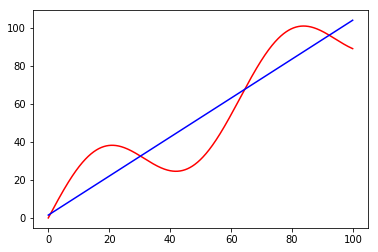

In [5]:
# Define data for plotting fitted line
X_plot = np.arange(100, step=0.1)
y_plot = X_plot * float(W_val) + float(b_val)

# Visualize Learning Results
plt.clf()
plt.plot(X_data, y_data, c='r')
plt.plot(X_plot, y_plot, c='b')
plt.show()